In [4]:
%%time
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

Wall time: 1.73 s


In [5]:
pwd

'C:\\Users\\n\\Desktop\\ASSIGNMENT 4'

In [6]:
df=pd.read_csv('C:\\Users\\n\\Desktop\\ASSIGNMENT 4/WA_Fn-UseC_-Telco-Customer-Churn.csv')
df.head(10)

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
5,9305-CDSKC,Female,0,No,No,8,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,99.65,820.5,Yes
6,1452-KIOVK,Male,0,No,Yes,22,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Credit card (automatic),89.10,1949.4,No
7,6713-OKOMC,Female,0,No,No,10,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,No,Mailed check,29.75,301.9,No
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
9,6388-TABGU,Male,0,No,Yes,62,Yes,No,DSL,Yes,...,No,No,No,No,One year,No,Bank transfer (automatic),56.15,3487.95,No


In [7]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [8]:
#a. Which 2 demographics have proven to be the most popular with the telco brand?

df1=df[['gender','SeniorCitizen','Churn','MonthlyCharges','TotalCharges','Partner','Dependents']]

In [9]:
df1

,gender,SeniorCitizen,Churn,MonthlyCharges,TotalCharges,Partner,Dependents
0,Female,0,No,29.85,29.85,Yes,No
1,Male,0,No,56.95,1889.5,No,No
2,Male,0,Yes,53.85,108.15,No,No
3,Male,0,No,42.30,1840.75,No,No
4,Female,0,Yes,70.70,151.65,No,No
...,...,...,...,...,...,...,...
7038,Male,0,No,84.80,1990.5,Yes,Yes
7039,Female,0,No,103.20,7362.9,Yes,Yes
7040,Female,0,No,29.60,346.45,Yes,Yes
7041,Male,1,Yes,74.40,306.6,Yes,No


In [10]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gender          7043 non-null   object 
 1   SeniorCitizen   7043 non-null   int64  
 2   Churn           7043 non-null   object 
 3   MonthlyCharges  7043 non-null   float64
 4   TotalCharges    7043 non-null   object 
 5   Partner         7043 non-null   object 
 6   Dependents      7043 non-null   object 
dtypes: float64(1), int64(1), object(5)
memory usage: 385.3+ KB


In [11]:
# checking how consistent is seniorcitizen(demographic) in the telco churn company
pd.crosstab(df1.Churn, df1.SeniorCitizen,
            margins = True)

SeniorCitizen,0,1,All
Churn,,,
No,4508,666,5174
Yes,1393,476,1869
All,5901,1142,7043


In [12]:
#checking for gender
pd.crosstab(df1.Churn, df1.gender,
            margins = True)

gender,Female,Male,All
Churn,,,
No,2549,2625,5174
Yes,939,930,1869
All,3488,3555,7043


In [13]:
pd.crosstab(df1.Churn, df1.Dependents,
            margins = True)

Dependents,No,Yes,All
Churn,,,
No,3390,1784,5174
Yes,1543,326,1869
All,4933,2110,7043


In [14]:
#checking for customers with partners
pd.crosstab(df1.Churn, df1.Partner,
            margins = True)

Partner,No,Yes,All
Churn,,,
No,2441,2733,5174
Yes,1200,669,1869
All,3641,3402,7043


From the above demographics we can see that there was a greater number of customers were not senior citizens.The customer gender  was not a major cause of churning. Customers with dependants and partners didnt churn at a higher rate. The most popular demographic with telco churn is SeniorCitizen and Dependants

In [15]:
df1.describe(include='object')

,gender,Churn,TotalCharges,Partner,Dependents
count,7043,7043,7043,7043,7043
unique,2,2,6531,2,2
top,Male,No,20.2,No,No
freq,3555,5174,11,3641,4933


    To increase customer retention the marketing team should target advertising to the  non seniorcitizen and the customers who have dependants.  

In [32]:

columns_to_convert = ['Partner', 'Dependents','PhoneService','OnlineSecurity' ,
                      'OnlineBackup', 'DeviceProtection', 'TechSupport', 'StreamingTV', 'StreamingMovies','PaperlessBilling',
                      'Churn']
                      
                      
df_model=df 
    
for item in columns_to_convert:
    df_model[item].replace(to_replace=['Yes', 'No'], value= [1,0], inplace = True)
df_model.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,1,0,1,0,No phone service,DSL,0,...,0,0,0,0,Month-to-month,1,Electronic check,29.85,29.85,0
1,5575-GNVDE,Male,0,0,0,34,1,No,DSL,1,...,1,0,0,0,One year,0,Mailed check,56.95,1889.5,0
2,3668-QPYBK,Male,0,0,0,2,1,No,DSL,1,...,0,0,0,0,Month-to-month,1,Mailed check,53.85,108.15,1
3,7795-CFOCW,Male,0,0,0,45,0,No phone service,DSL,1,...,1,1,0,0,One year,0,Bank transfer (automatic),42.30,1840.75,0
4,9237-HQITU,Female,0,0,0,2,1,No,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Electronic check,70.70,151.65,1


<function matplotlib.pyplot.show(*args, **kw)>

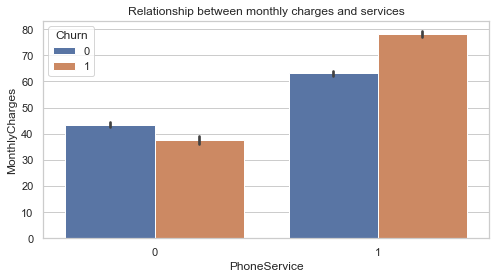

In [42]:
#a. Which 3 services are contributing to a higher monthly charge and resulting tocustomers churning? (Use visualizations in explaining your analysis)
plt.figure(figsize = (8,4))
sns.set(style = 'whitegrid')
sns.barplot(y='MonthlyCharges',x='PhoneService',hue ='Churn',data=df_model)
plt.title('Relationship between monthly charges and services')
plt.show


In [46]:
# b.If the telco was to offer Phone as a standalone service, which type of contract would encourage customer retention
pd.crosstab(df.Contract, df.PhoneService, margins = True)

PhoneService,0,1,All
Contract,,,
Month-to-month,376,3499,3875
One year,145,1328,1473
Two year,161,1534,1695
All,682,6361,7043


If telco company was to offer phones as a standalone service the best contract would be Month-to-month as it has a larger number of users and avoid there churning.

In [19]:
#If the company was to streamline all its services into 3 bouquet packages, 
#what monthly prices will be appropriate for the following packages to keep customers from churning:
#i. Basic ii. Plus iii. Premium

In [51]:
#Should the company strictly go paperless for their monthly billings as a technique of keeping their customers and why?
data=df_model["PaperlessBilling"].value_counts()

In [52]:
data

1    4171
0    2872
Name: PaperlessBilling, dtype: int64

In [53]:
pd.crosstab(df_model.Churn, df_model.PaperlessBilling, margins = True)

PaperlessBilling,0,1,All
Churn,,,
0,2403,2771,5174
1,469,1400,1869
All,2872,4171,7043


from the above analysis its clear that most customers prefer paperlessBilling,The relation between churning and PaperlessBilling is not that clear the company can check on other reasons.